In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')

#converting data to numpy array
dfx=dfx.values
dfy=dfy.values
print(dfy.shape)

#interchanging n*1 array to n*? array (? denotes any dimension)
x=dfx.reshape((-1,))
y=dfy.reshape((-1,))
print(y)

(99, 1)
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99387 1.0004  0.9972  0.9972
 0.99546 0.9978  0.99596 0.99572 0.9992  0.99544 0.99747 0.99668 0.9962
 0.99346 0.99514 0.99476 1.001   0.9961  0.99598 0.99608 0.9966  0.99732
 0.9962  0.99546 0.99738 0.99456 0.9966  0.99553 0.9984  0.9952  0.997
 0.99586 0.9984  0.99542 0.99655 0.9962  0.9976  0.99464 0.9983  0.9967 ]


# Data preprocessing and Visualisation

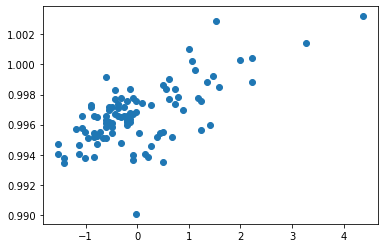

In [10]:
#normalising the data that is shifting the points from origin
#normalising is done because to adjust the values into a given range.
#for ex: a dataset consists of points (1,2) and (10000,2) the normalization converts the points into a range like [0,100]
x=(x-x.mean())/x.std()
y=y
plt.scatter(x,y)
plt.show()

# Gradient Descent Algorithm

In [14]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x #hx=mx+c linear equation,where theta[0]=c and theta[1]=m

In [26]:
#calculating mean square error
#mse is chosen because it creates a parabola function and when a line is drawn it creates a convex function
#so the gradient descent converges to a local minimum
#if we divide the error by x.shape[0],then we also divide the gradient by 2*x.shape[0]
def error(x,y,theta):
    error=0
    for i in range(x.shape[0]):#x.shape[0] gives the number of points(records) in the dataset
        hx=hypothesis(x[i],theta)
        error+=(hx-y[i])**2  #mse calculation
    return error #(or) error/x.shape[0]

In [23]:
#the grad list contains the number of  rows in theta i.e the number of factors that influence the target value
#the given data is of single variable linear regression,so it consists only m,c
def gradient(x,y,theta):
    grad=np.zeros((theta.shape))#theta.shape=number of factors affecting the target variable
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        #j=predicted value-exact value i.e., j=hx-y => j=mx+c-y
        #partially differentiating j with respect to c=> grad[0]=mx+c-y
        grad[0]+=(hx-y[i])
        #partially differentiating j with respect to m=> grad[1]=(mx+c-y)*x
        grad[1]+=(hx-y[i])*x[i]
    return grad #(or) grad/x.shape[0]

In [6]:
#applying the gradient descent
#using the update rule of theta
def gradientdescent(x,y,alpha=0.001):
    #alpha=0.001 is mostly preferred value as high alpha may miss the optimal minimum in the parabola
    #low alpha makes the model's learning rate slow
    #assigning random theta values that is random m and c values
    theta=np.array([-2.0,0.0])
    max_iter=100
    itr=0
    error_list=[]
    theta_list=[]
    while(itr<=max_iter):
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        error_list.append(err)
        theta_list.append(theta)
        #here we subtract value from theta because we have to meet the local minimum that means move down to the parabola
        #update rule of theta[0]=theta[0]-alpha*differentiated part
        theta[0]-=alpha*grad[0]
        #update rule of theta[1]=theta[1]-alpha*differentiated part
        theta[1]-=alpha*grad[1]
        itr+=1
    return theta,error_list,theta_list

In [27]:
#final_theta gives the m and c values for the expected line
final_theta,error_list,theta_list=gradientdescent(x,y)

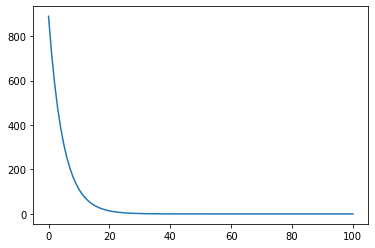

In [28]:
plt.plot(error_list)
plt.show()


In [29]:
print(final_theta)

[0.996554  0.0013579]


In [30]:
#plot the line for testing data
xtest=np.linspace(1,8,10)

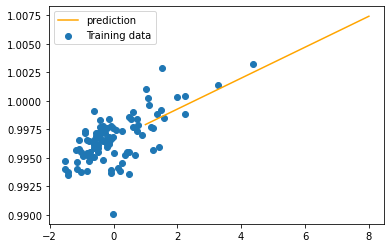

In [37]:
plt.scatter(x,y,label="Training data")
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='prediction')
plt.legend()
plt.show()